### softmax

In [53]:
import numpy as np
a = np.random.rand(10,2)

In [13]:
b = np.exp(a)

In [14]:
b

array([[2.11560907, 1.18549965],
       [1.59606221, 1.18056098],
       [1.09716666, 1.16353934],
       [1.9202127 , 1.95041626],
       [2.45972565, 1.79287486],
       [1.65564724, 2.00973726],
       [2.18336709, 1.33127682],
       [2.57465069, 2.68756648],
       [1.86538468, 1.38330082],
       [1.23987765, 1.66981995]])

In [15]:
np.sum(b)

35.06229603265164

In [18]:
def my_softmax(num):
    sm = np.exp(num)/np.sum(np.exp(num),axis = 1, keepdims= True)
    return sm

In [56]:
len(my_softmax(a))

10

In [55]:
np.sum(my_softmax(a),axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### feedforward nn

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
N = 300
X1 = np.random.rand(N,2) + np.array([2,-2])
X2 = np.random.rand(N,2) + np.array([-2,2])
X3 = np.random.rand(N,2) + np.array([1,1])
X = np.vstack((X1,X2,X3))

In [45]:
Y = np.array([0]* 300 + [1] * 300 + [2]*300)

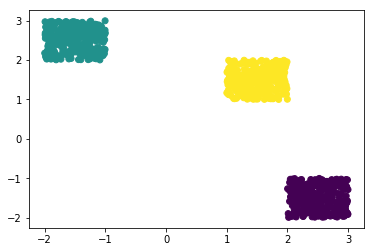

In [46]:
plt.scatter(X[:,0],X[:,1],c = Y)

In [47]:
#parameters
W1 = np.random.rand(2,3)
b1 = np.random.rand(3)
W2 = np.random.rand(3,3)
b2 = np.random.rand(3)

In [48]:
def my_sigmoid(x):
    return 1/(1+np.exp(-1*x))

In [49]:
def my_softmax(num):
    sm = np.exp(num)/np.sum(np.exp(num),axis = 1, keepdims= True)
    return sm

In [50]:
def my_forward(x,w1,b1,w2,b2):
    z = my_sigmoid(x.dot(w1) + b1)
    y_b = z.dot(w2) + b2
    y = my_softmax(y_b)
    return y   

In [58]:
def my_rate(p,y):
    right_count = 0
    for i in range(len(p)):
        if p[i] == y[i]:
            right_count += 1
    rate = right_count / len(p)
    return rate

In [64]:
y_pre = my_forward(X,W1,b1,W2,b2)
p = np.argmax(y_pre,axis = 1)

In [65]:
rate = my_rate(p,Y)

In [66]:
print(rate)

0.1288888888888889


### ecommerce project

In [67]:
import numpy as np
import pandas as pd

In [86]:
def get_data():
    dt = pd.read_csv('ecommerce_data.csv')
    dt = dt.as_matrix()
    N,D = dt.shape
    X = dt[:,:-1]
    Y = dt[:,-1]
    #normalize the 2,3 columns
    X[:,1] = (X[:,1] - np.mean(X[:,1]))/np.std(X[:,1])
    X[:,2] = (X[:,2] - np.mean(X[:,2]))/np.std(X[:,2])
    #one-hot the 4 column
    X2 = np.zeros((N,D+2))
    X2[:,:-4] = X[:,:-1]
    for i in range(N):
        code = int(X[i,-1])
        X2[i,D-2+code] = 1
    
    return X2, Y
    

In [100]:
def get_binary():
    X, Y = get_data()
    X2 = X[Y<2,:]
    Y2 = Y[Y<2]
    
    return X2, Y2

In [113]:
X, Y = get_binary()

In [117]:
N,D = X.shape
M = 5
K = len(set(Y))
W1 = np.random.rand(D,M)
b1 = np.random.rand(M)
W2 = np.random.rand(M,K)
b2 = np.random.rand(K)

In [118]:
print(X.shape)
print(Y.shape)

(398, 8)
(398,)


In [119]:
y_pre = my_forward(X,W1,b1,W2,b2)
print(y_pre)
# p = np.argmax(y_pre,axis = 1)

[[0.39432599 0.60567401]
 [0.3668174  0.6331826 ]
 [0.39729959 0.60270041]
 [0.37275634 0.62724366]
 [0.42180161 0.57819839]
 [0.36053757 0.63946243]
 [0.43194646 0.56805354]
 [0.4133429  0.5866571 ]
 [0.41141743 0.58858257]
 [0.34582452 0.65417548]
 [0.42050746 0.57949254]
 [0.36015973 0.63984027]
 [0.33240238 0.66759762]
 [0.3868017  0.6131983 ]
 [0.45371283 0.54628717]
 [0.4406002  0.5593998 ]
 [0.3812062  0.6187938 ]
 [0.44976008 0.55023992]
 [0.39760764 0.60239236]
 [0.35799683 0.64200317]
 [0.39541865 0.60458135]
 [0.39396621 0.60603379]
 [0.36182896 0.63817104]
 [0.35219646 0.64780354]
 [0.42280715 0.57719285]
 [0.43817288 0.56182712]
 [0.34184656 0.65815344]
 [0.37793655 0.62206345]
 [0.41805407 0.58194593]
 [0.35166048 0.64833952]
 [0.44624406 0.55375594]
 [0.38318476 0.61681524]
 [0.42235731 0.57764269]
 [0.36677818 0.63322182]
 [0.39589814 0.60410186]
 [0.34923465 0.65076535]
 [0.37195787 0.62804213]
 [0.36354099 0.63645901]
 [0.37219488 0.62780512]
 [0.3288493  0.6711507 ]


In [120]:
p = np.argmax(y_pre,axis = 1)

In [123]:
rate = my_rate(p,Y)

In [124]:
rate

0.36432160804020103

In [125]:
def my_tanh(x):
    a = np.exp(x)
    b = np.exp(-x)
    return (a-b)/(a+b)

In [127]:
my_tanh(1)

0.7615941559557649

In [128]:
z = np.array([my_tanh(3),my_tanh(1)])

In [130]:
y_pre = z.dot(np.array([[0,1],[1,1]]))

In [131]:
y_pre

array([0.76159416, 1.75664891])

In [135]:
num = y_pre

In [136]:
sm = np.exp(num)/np.sum(np.exp(num))
sm

array([0.26991483, 0.73008517])

### back-propagation

In [1]:
import numpy as np

In [2]:
def my_forward(x,w1,b1,w2,b2):
    z = my_sigmoid(x.dot(w1) + b1)
    y_b = z.dot(w2) + b2
    y = my_softmax(y_b)
    return y   

In [3]:
def my_rate(p,y):
    right_count = 0
    for i in range(len(p)):
        if p[i] == y[i]:
            right_count += 1
    rate = right_count / len(p)
    return rate